In [2]:
import torch
from torch.utils.data import Dataset, DataLoader
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from DrawtexDataset import DrawtexDataset
from DrawtexModel import DrawtexModel
from skimage import morphology

In [3]:
model = DrawtexModel()
model.load_state_dict(torch.load("DrawtexModel2.pth", map_location=torch.device("cpu")))
model.eval()

ds: DrawtexDataset = DrawtexDataset(transforms.ToTensor())

dl = DataLoader(
    dataset=ds,
    batch_size=1,
    shuffle=True,
    num_workers=1
)


RuntimeError: Error(s) in loading state_dict for DrawtexModel:
	size mismatch for conv1.weight: copying a param with shape torch.Size([150, 1, 9, 9]) from checkpoint, the shape in current model is torch.Size([200, 1, 9, 9]).
	size mismatch for conv1_bn.weight: copying a param with shape torch.Size([150]) from checkpoint, the shape in current model is torch.Size([200]).
	size mismatch for conv1_bn.bias: copying a param with shape torch.Size([150]) from checkpoint, the shape in current model is torch.Size([200]).
	size mismatch for conv1_bn.running_mean: copying a param with shape torch.Size([150]) from checkpoint, the shape in current model is torch.Size([200]).
	size mismatch for conv1_bn.running_var: copying a param with shape torch.Size([150]) from checkpoint, the shape in current model is torch.Size([200]).
	size mismatch for conv2.weight: copying a param with shape torch.Size([200, 150, 9, 9]) from checkpoint, the shape in current model is torch.Size([250, 200, 9, 9]).
	size mismatch for conv5.weight: copying a param with shape torch.Size([800, 500, 9, 9]) from checkpoint, the shape in current model is torch.Size([800, 500, 5, 5]).
	size mismatch for lin1.weight: copying a param with shape torch.Size([326, 20000]) from checkpoint, the shape in current model is torch.Size([331, 64800]).
	size mismatch for lin1_bn.weight: copying a param with shape torch.Size([326]) from checkpoint, the shape in current model is torch.Size([331]).
	size mismatch for lin1_bn.bias: copying a param with shape torch.Size([326]) from checkpoint, the shape in current model is torch.Size([331]).
	size mismatch for lin1_bn.running_mean: copying a param with shape torch.Size([326]) from checkpoint, the shape in current model is torch.Size([331]).
	size mismatch for lin1_bn.running_var: copying a param with shape torch.Size([326]) from checkpoint, the shape in current model is torch.Size([331]).

In [1]:
iter = enumerate(dl)
idx, (img, label) = next(iter)

classes = ['5', '\\mathcal{L}', '\\epsilon', '\\partial', '\\hbar', '\\succ', '\\mathbb{H}', '\\mu', '\\mathscr{E}', '\\Leftarrow', '\\lozenge', '\\Psi', '\\aleph', '\\ltimes', '\\bullet', '\\mathscr{S}', '\\astrosun', '\\subsetneq', 'F', '\\wr', '\\pi', '\\frown', '\\pounds', 'O', '\\parallel', '\\searrow', '\\mathscr{L}', '\\prec', '\\mathds{E}', '\\subset', '\\Lambda', '\\lhd', '\\iota', '\\nsubseteq', '\\curvearrowright', '\\mathfrak{A}', '\\nabla', '\\mathscr{C}', '\\ell', '\\chi', '\\geq', '\\Theta', '/', '\\nvDash', '\\coprod', '\\nRightarrow', 'Y', '\\theta', '\\mathcal{B}', 'D', '\\vDash', '\\downarrow', '\\mathscr{A}', '\\otimes', '\\rho', '\\pm', '\\sim', '\\perp', 'X', '\\vdots', '\\mathcal{O}', '\\dots', '\\celsius', '\\mathcal{H}', '\\|', '\\cong', '\\emptyset', '\\varepsilon', '\\mathds{C}', '\\leadsto', '\\square', '\\iddots', '\\lesssim', '\\wedge', '\\rtimes', '\\asymp', '9', '\\between', '\\nearrow', '\\mathcal{U}', '\\female', '\\mathcal{S}', '\\zeta', '\\rightarrow', '\\circlearrowleft', '\\backsim', '\\top', '\\o', '\\nrightarrow', '\\mathcal{X}', '\\mathcal{A}', '\\mathscr{P}', '\\mapsto', '\\mathds{Z}', '\\llbracket', '\\Re', '\\doteq', '\\mapsfrom', '\\varrho', '\\barwedge', '\\lightning', '\\succeq', '\\rfloor', '\\int', '\\sphericalangle', ']', '\\sun', '\\Vdash', 'R', '\\tan', 'H', '\\phi', 'E', '\\prod', '\\prime', '\\heartsuit', '\\Im', '\\beta', '\\triangleright', '\\cdot', '\\&', '\\equiv', '\\mathcal{T}', '\\fullmoon', '\\Bowtie', '\\Omega', '\\oint', '\\sigma', '<', '\\sqcup', '\\dag', '[', '\\kappa', '\\xi', '\\mathcal{F}', '7', '\\leftrightarrow', 'P', '\\approx', '\\rceil', '\\L', '\\varpi', '\\rrbracket', '\\Phi', 'B', 'G', '\\pitchfork', '\\flat', 'T', '\\dashv', 'U', '\\sum', 'Z', '\\triangleleft', '\\diameter', '\\circ', '\\ae', '\\leftarrow', '\\blacksquare', '\\%', '\\langle', '\\mathscr{H}', '\\eta', '\\oplus', '\\hookrightarrow', '\\Downarrow', 'L', '\\varphi', '2', '\\varoiint', '\\venus', '\\Xi', '\\Sigma', '\\sqcap', '|', '\\therefore', '\\O', '\\ni', '\\AA', '\\{', '\\vdash', '\\bot', '\\mathds{R}', '\\male', '\\mp', '\\propto', '3', '\\mathfrak{M}', '\\subseteq', '\\sqsubseteq', '\\mathds{N}', '\\odot', '\\vee', '\\notin', '\\angle', '\\preceq', '\\nu', '\\twoheadrightarrow', '\\boxplus', '\\times', '\\varnothing', '\\exists', '\\Leftrightarrow', '\\cap', '\\multimap', '\\bowtie', '\\Gamma', '\\omega', 'K', '\\geqslant', '\\triangleq', '\\tau', '\\vartheta', '\\gtrless', '\\div', '6', '\\mathds{P}', '\\diamond', '\\mathds{1}', '\\ddots', '\\lambda', '\\forall', '\\rightleftarrows', '\\cup', '\\oiint', '\\ominus', '1', '\\clubsuit', '\\mathcal{Z}', '\\checkmark', '\\mathscr{F}', '\\mathcal{M}', '\\rightleftharpoons', '\\#', '\\rangle', '\\mathcal{D}', '\\varsubsetneq', '\\mars', '\\backslash', '\\rightrightarrows', '\\ss', '\\mathcal{N}', '\\models', '\\$', 'C', '+', '\\varkappa', '\\gtrsim', '\\leqslant', '\\mathbb{1}', '\\rightharpoonup', '\\diamondsuit', '\\S', '\\infty', '\\fint', '\\neq', '\\mathscr{D}', '\\star', '\\mathcal{P}', '\\preccurlyeq', '\\lceil', '\\AE', '\\Delta', '\\because', '>', '\\wp', '\\supseteq', 'I', '\\uplus', 'J', '\\alpha', '\\mathfrak{S}', '\\blacktriangleright', 'N', '\\circlearrowright', '\\mathfrak{X}', '\\amalg', '\\log', '0', '\\psi', '\\sharp', '\\mathcal{E}', '\\parr', '\\supset', 'V', '\\Pi', 'Q', '\\leq', 'M', '\\delta', '\\guillemotleft', '\\trianglelefteq', '\\circledR', '\\lfloor', '\\nexists', '\\}', '\\neg', '\\mathcal{C}', '\\boxdot', '\\aa', '\\gamma', '\\copyright', '\\circledast', '-', '4', '\\mathds{Q}', '\\mathcal{G}', '\\Longleftrightarrow', '\\uparrow', 'W', '\\lim', '\\circledcirc', '\\not\\equiv', 'S', '\\ast', '\\upharpoonright', '\\leftmoon', '\\degree', '\\sqrt{}', 'A', '\\nmid', '\\Rightarrow', '8', '\\mathcal{R}', '\\sin', '\\simeq', '\\boxtimes', '\\in', '\\cos', '\\rightsquigarrow', '\\ohm']

out: torch.Tensor = model(img)
plt.imshow(img[0][0], cmap="gray")
_, pred = torch.max(out, 1)

print(classes[pred])


NameError: name 'dl' is not defined

2


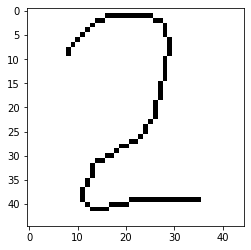

In [8]:
img = cv2.imread("./test2.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.threshold(img, 128, 1, cv2.THRESH_BINARY)[1]
img = cv2.resize(img, (45, 45))
# Convert image shape to have 1 channel (standard image format)
img = img.reshape(45, 45, 1)
img ^= 1
img = morphology.skeletonize(img)
img ^= 1
ts = transforms.ToTensor()
img: torch.Tensor = ts(img)
img = img.unsqueeze(0)

out = model(img)
_, pred = torch.max(out, 1)

print(classes[pred])
plt.imshow(img[0][0], cmap="gray")